In [1]:
import numpy as np
import pandas as pd
import os
import glob
import shutil
from IPython.display import clear_output

def get_summary(all_df):
    temp_df = all_df[all_df['iter_num'] == 9999][['exploitation_hits', 'exploration_hits', 'total_hits', 'hs_id', 'hs_group']]
    temp_df['hs_id'] = temp_df['hs_id'] + '_' + temp_df['hs_group']
    top_df = temp_df.groupby('hs_id').mean()
    top_df.columns = [x+'_mean' for x in top_df.columns]
    top_df['total_hits_std'] = temp_df[['total_hits', 'hs_id']].groupby('hs_id').std()
    top_df['run_counts'] = temp_df[['total_hits', 'hs_id']].groupby('hs_id').count()
    top_df = top_df.sort_values('total_hits_mean', ascending=False)
    return top_df

summary_files = glob.glob('../../../aldd_results/params_results_exp_1_latest/*/*/*/*/')

In [2]:
successful_jobs = []
failed_jobs = []

all_0 = []
all_1 = []
all_2 = []
for i, sf in enumerate(summary_files):
    clear_output()
    print('{}/{}'.format(i, len(summary_files)))
    sf_splits = sf.split('\\')
    hs_group = sf_splits[1]
    hs_id = sf_splits[2]
    rf_id = sf_splits[3]
    batch_size = sf_splits[4]
    
    batch_cpds = glob.glob(sf+'iter_*\expl*.csv')
    if len(batch_cpds) > 0:
        cpd_df = pd.concat([pd.read_csv(x) for x in batch_cpds])
    
        if cpd_df.shape[0] == 10*int(batch_size.split('_')[-1]):
            assert cpd_df['Index ID'].unique().shape[0] == 10*int(batch_size.split('_')[-1])
            successful_jobs.append('{}_rf_{}_{}'.format(hs_id, rf_id, batch_size))
        else:
            failed_jobs.append('{}_rf_{}_{}'.format(hs_id, rf_id, batch_size))
            continue
    else:
        failed_jobs.append('{}_rf_{}_{}'.format(hs_id, rf_id, batch_size))
        continue
    
    des_cols = ['iter_num', 
                'exploitation_hits', 'exploitation_max_hits', 'exploitation_batch_size',
                'exploration_hits', 'exploration_max_hits', 'exploration_batch_size',
                'total_hits', 'total_max_hits', 'total_batch_size']
    summary_df = pd.read_csv(sf+'\summary.csv')
    summary_df = summary_df[des_cols]
    summary_df['rf_id'] = rf_id
    summary_df['hs_id'] = hs_id
    summary_df['batch_size'] = int(batch_size.split('_')[-1])
    summary_df['hs_group'] = hs_group
    
    if int(batch_size.split('_')[-1]) == 96:
        all_0.append(summary_df)
    elif int(batch_size.split('_')[-1]) == 384:
        all_1.append(summary_df)
    else:
        all_2.append(summary_df)

all_0 = pd.concat(all_0)
all_1 = pd.concat(all_1)
all_2 = pd.concat(all_2)
all_df = pd.concat([all_0, all_1, all_2])

1155/1156


In [4]:
print('Total jobs: {}'.format(len(successful_jobs) + len(failed_jobs)))
print('Failed jobs: {}'.format(len(failed_jobs)))
print('Successful jobs: {}'.format(len(successful_jobs)))

Total jobs: 1156
Failed jobs: 354
Successful jobs: 802


In [28]:
top_0 = get_summary(all_0)
top_0

,exploitation_hits_mean,exploration_hits_mean,total_hits_mean,total_hits_std,run_counts
hs_id,,,,,
ClusterBasedWCSelector_368_top_96,45.600000,102.900000,148.500000,49.668344,10
ClusterBasedWCSelector_341_top_96,17.444444,128.555556,146.000000,58.570470,9
ClusterBasedWCSelector_678_top_96,0.000000,145.125000,145.125000,39.349850,8
ClusterBasedWCSelector_201_top_1536,0.400000,140.400000,140.800000,44.424218,10
ClusterBasedWCSelector_444_top_1536,11.888889,125.333333,137.222222,56.308920,9
ClusterBasedWCSelector_467_top_96,22.900000,112.600000,135.500000,18.869434,10
ClusterBasedWCSelector_428_top_384,0.000000,134.333333,134.333333,64.857536,9
ClusterBasedWCSelector_581_top_384,127.111111,4.777778,131.888889,54.812053,9
ClusterBasedWCSelector_533_top_1536,1.375000,127.250000,128.625000,61.428094,8


In [7]:
a = all_0[all_0['hs_id'].isin(['_'.join(x.split('_')[:2]) for x in top_0.index[:3]])]
a = a[['hs_id', 'iter_num', 'rf_id', 'exploitation_hits', 'exploration_hits', 'total_hits', 'hs_group']]
a[a['iter_num'] == 9999].sort_values(['hs_id', 'total_hits'], ascending=False)

,hs_id,iter_num,rf_id,exploitation_hits,exploration_hits,total_hits,hs_group
10,ClusterBasedWCSelector_533,9999.0,1338,1.0,169.0,170.0,top_1536
10,ClusterBasedWCSelector_533,9999.0,2233,0.0,167.0,167.0,top_1536
10,ClusterBasedWCSelector_533,9999.0,1017,0.0,166.0,166.0,top_1536
10,ClusterBasedWCSelector_533,9999.0,1179,0.0,162.0,162.0,top_1536
10,ClusterBasedWCSelector_533,9999.0,3845,1.0,124.0,125.0,top_1536
10,ClusterBasedWCSelector_533,9999.0,1069,8.0,65.0,73.0,top_1536
10,ClusterBasedWCSelector_533,9999.0,2053,0.0,1.0,1.0,top_1536
10,ClusterBasedWCSelector_444,9999.0,1179,10.0,159.0,169.0,top_1536
10,ClusterBasedWCSelector_444,9999.0,2233,14.0,154.0,168.0,top_1536
10,ClusterBasedWCSelector_444,9999.0,2053,14.0,153.0,167.0,top_1536


In [6]:
top_1 = get_summary(all_1)
top_1

,exploitation_hits_mean,exploration_hits_mean,total_hits_mean,total_hits_std,run_counts
hs_id,,,,,
ClusterBasedWCSelector_288_top_384,0.000000,228.000000,228.000000,0.000000,2
ClusterBasedWCSelector_411_top_384,0.000000,218.571429,218.571429,18.410659,7
ClusterBasedWCSelector_444_top_1536,13.375000,204.875000,218.250000,22.473794,8
ClusterBasedWCSelector_341_top_96,17.833333,200.166667,218.000000,18.406521,6
ClusterBasedWCSelector_227_top_1536,0.000000,214.333333,214.333333,11.779219,9
ClusterBasedWCSelector_609_top_1536,0.000000,213.857143,213.857143,21.114202,7
ClusterBasedWCSelector_86_top_1536,0.000000,211.000000,211.000000,18.894444,9
ClusterBasedWCSelector_368_top_96,55.000000,152.333333,207.333333,23.586719,3
ClusterBasedWCSelector_533_top_1536,3.250000,202.375000,205.625000,15.546589,8


In [22]:
top_2 = get_summary(all_2)
top_2

,exploitation_hits_mean,exploration_hits_mean,total_hits_mean,total_hits_std,run_counts
hs_id,,,,,
ClusterBasedWCSelector_481_middle_1536,0.0,76.0,76.0,NaN,1
ClusterBasedWCSelector_104_worst_96,0.0,49.1,49.1,6.332456,10
ClusterBasedWCSelector_734_middle_1536,0.0,48.6,48.6,5.719363,10


---
# Plots

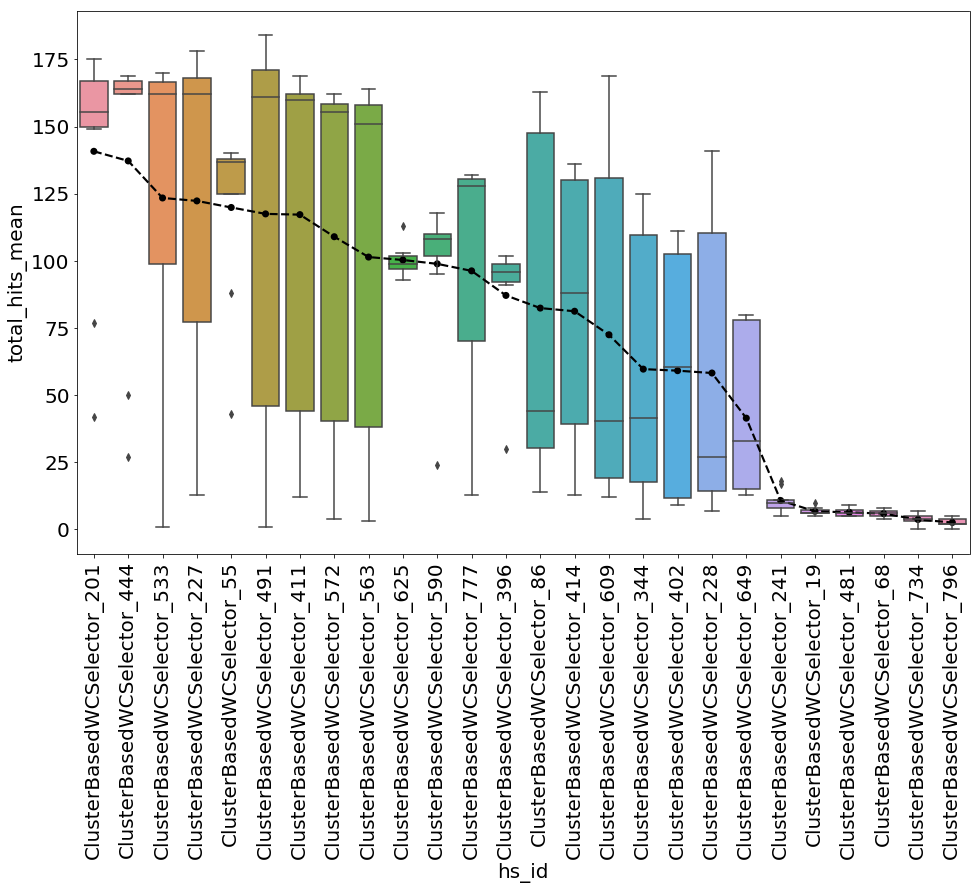

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})


top_0['hs_id'] = ['_'.join(x.split('_')[:2]) for x in top_0.index]
all_0.index = all_0['hs_id']

plt.figure(figsize=(16, 10))
sns.boxplot(x="hs_id", y="total_hits", data=all_0[all_0['iter_num'] == 9999].loc[list(top_0['hs_id']),:])
sns.pointplot(x="hs_id", y="total_hits_mean", data=top_0, linestyles='--', scale=0.8, 
              color='k', errwidth=0, capsize=0)

plt.xticks(rotation=90)
plt.show()

---
# In-Depth